In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import warnings

warnings.filterwarnings("ignore")


# Cancelamentos de Reservas

https://www.kaggle.com/competitions/ih-hotel-booking

In [40]:
tb_hotel = pd.read_csv("data/tb_hotel_traintest.csv")


* **hotel** - (str) Tipo de hotel.
* **is_cancelled** - (binary) Variável binária indicando cancelamento da reserva (0 = não cancenlada, 1 = cancelada) - variável resposta do case.
* **lead_time** - (int) Número de dias entre data da reserva e data de entrada no hotel (quando a reserva foi feita).
* **arrival_date** - (date) Data de entrada no hotel (para quando a reserva é).
* **stays_in_weekend_nights** - (int) Número de dias em finais de semana na reserva.
* **stays_in_week_nights** - (int) Número de dias de semana na reserva.
* **adults** - (int) Número de adultos.
* **children** - (int) Número de crianças.
* **babies** - (int) Número de bebes.
* **meal** - (str) Tipo de refeição inclusa na reserva.
* **country** - (str) País do cliente.
* **market_segment** - (str) Segmentação de marketing do cliente.
* **distribution_channel** - (str) Canal de vendas pelo qual a reserva foi feita.
* **is_repeated_guest** - (binary) O cliente já ficou hospedado no hotel? (0 = não, 1 = sim).
* **previous_cancellations** - (int) Quantas reservas o cliente já cancelou no passado.
* **previous_bookings_not_canceled** - (int) Quantas reservas o cliente já fez e não cancelou no passado.
* **reserved_room_type** - (str) Tipo de quarto desejado.
* **assigned_room_type** - (str) Tipo de quarto reservado.
* **booking_changes** -  (str) Número de mudanças na reserva entre data de reserva e entrada/cancelamento.
* **deposit_type** - (str) Tipo de adiantamento feito no momento da reserva.
* **agent** - (str) ID do Agente que fez a reserva (NA caso a reserva não tenha sido feita por um agente).
* **company**  - (str) ID da empresa que fez a reserva (NA caso a reserva não seja corporativa)
* **days_in_waiting_list** - (int) Quantos dias demorou a confirmação da reserva.
* **customer_type** - (str) Tipo de reserva.
* **adr** - (float) Average Daily Rate, preço médio de cada diária na reserva.
* **required_car_parking_spaces** - (int) Número de vagas em estacionamento requisitadas na reserva.
* **total_of_special_requests** - (int) Número de requisições especiais na reserva (cama dupla, andar, quarto com vista...)
* **reservation_status_date** - (date) Data da última atualização feita na reserva.

In [41]:
tb_hotel.head()


,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,NaN,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,NaN,0,Transient,75.0,0,0,2015-07-02,2015-07-01,3
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,NaN,0,Transient,98.0,0,1,2015-07-03,2015-07-01,4


In [42]:
profile = ProfileReport(
    tb_hotel[["lead_time", "adults"]], title="Pandas Profiling Report", explorative=True
)
profile.to_widgets()


Generate report structure: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


# Goal – Predictive Analytics

## Definition

In this stage we ask you to pick the booking dataset notebook you previously worked on and perform feature engineering and feature selection so that the dataset is ready for binary model classification training that furthermore be able to predict correctly if a booking instance will be cancelled or not.
Requirements:
- Feature engineering | Examples:
    - Combine features
    - Feature scaling transformations
    - Binarizations
- Feature selection
- Predictive model implementation
- Setup data splits (train/test)
- Experiment at least 2 models
    - What are their advantages?
    - What are their disadvantages?
- Evaluate models performance and implement other classification metrics
- Briefly explain their meaning
- Write notes explaining your decisions

## Deliverable

The main output of this stage is a prediction analytics notebook of a hotel bookings dataset with the aim of booking churn predictions. Notes must be included which explains your critical thinking and assumptions.

# Etapas de Construção de um Modelo

Antes de seguir em frente com a atividade vamos relembrar as etapas para construir um modelo!

## Leitura de dados

A primeira etapa na construção de qualquer modelo é a obtenção dos dados. Isso pode ser *tão simples quanto carregar um dataset* da SKLEARN ou *tão complexo quanto construir um webscrapper*. 

No exemplo de hoje estaremos trabalhando sobre uma tabela disponibilizada em CSV. O checklist abaixo pode guia-lo no processo de carregar e validar a entrada de dados:

- **Ler arquivo .csv para um DataFrame pandas**
- **Validar número de colunas**
- **Validar e tratar tipo das colunas** (principalmente datas através da função pd.to_datetime)
- **Ler mapa de dados** (caso seja disponibilizado) para entender o que cada coluna representa.

## EDA (Análise Exploratória de Dados)

A segunda etapa na construção de um modelo é a análise exploratória de dados. Neste momento buscamos *entender* o nosso conjunto de dados através de gráficos e tabelas que resumam a relação entre as diversas variáveis.

Vamos relembrar dos objetivos dessa etapa:

- **Avaliação de problemas nos dados** (missing value e informações incorretas)
    - **Ferramentas:** .info, .describe, .head, mapa de dados
- **Familiarização com o conteúdo de cada variável**
    - **Ferramentas:** boxplots e histogramas, tabelas de contagem, pandas-profiling
- **Mapeamento das relações entre meus features e minha variável resposta**
    - **Ferramentas:** scatterplots e pairplots, .groupby, .pivot_table, PCA 
- **Feature Engineering** para criar novas variáveis
    - **Ferramentas:** PCA, np.log, .qcut e .cut, np.where e .loc
    - *Feature engineering é um dos aspectos mais complexos e impactantes* na construção de um modelo. As transformações mais comuns são as transformações numéricas (como o log), a discretização de variáveis continuas (através de cut, qcut ou np.where), a aglomeração de categorias, a binarização de variáveis continuas e categóricas.
    
Nesta etapa devemos investir tempo em tentar **ENTENDER O PROBLEMA**:

- *Qual é o fenômeno que queremos modelar*?
- *Sem considerar os dados, o que, conceitualmente, impacta minha variável resposta?*
- *Considerando os dados, quais variáveis representam bem esses conceitos?*

No entanto, devemos estar atentos ao **tempo disponível** para resolvermos o problema! Qualquer modelo pode ser melhorado se investirmos mais tempo nele, logo o tempo disponível é uma pré-condição do erro que iremos obter. O **processo de modelagem é iterativo** e a construção de modelos simples e imprecisos é uma etapa importante na construção de modelos complexos.

Embora o principal resultado de uma análise exploratória seja o *aprofundamento do nosso conhecimento* sobre o problema, na prática também devemos obter um **FEATURE SET**, um conjunto de variáveis de entrada sobre o qual construíremos nossos modelos. Uma vez que tenhamos este feature set podemos dividi-lo em conjunto de treinamento e um de teste - sempre prestando atenção nos problemas de **leakage**:

- Caso o nosso feature set contenha transformações que sejam calculadas a partir dos dados (por exemplo normalização ou PCA) devemos construir estes transformadores utilizando apenas o conjunto train e então aplica-los ao conjunto teste.
- Muitas vezes algumas variáveis de uma tabela podem ser contaminadas: por exemplo, em um problema de previsão binária de chuva não podemos utilizar a variável mm/h de chuva. Uma forma simples de tratar isso é se perguntar: terei esta variável no momento da previsão?

## Modelo Baseline

Os modelos de baseline são modelos simples (do ponto de vista matemático) que fornecem um erro base que tentaremos melhorar através da utilização de algoritmos mais sofisticados. Como vimos, muitos algoritmos tem hiperparâmetros que são criticos na construção de um modelo. A utilização de modelos simples nos dá um valor de comparação para avaliarmos os primeiros hiperparâmetros que testarmos.

Dois modelos são comumemnte utilizados como baseline preditivo:

- **Regressão logística**
- **1-NN (kNN com n-neighbors = 1)**

A *regressão logística é um modelo linear*, sem nenhum hiperparâmetro, ou seja, o resultado da regressão em si é fruto apenas das variáveis de entrada escolhidas.

Além da simplicidade, **ela é uma ferramenta investigativa interessante** - possibilitando mapear os efeitos de variáveis específicas dentro de um feature set: como vimos a **colinearidade entre variáveis de entrada altera o impacto** que cada uma tem quando as consideramos conjuntamente. **A regressão nos permite desembaraçar estes efeitos!** Podemos utilizar simulações como vimos em aula para aumentar nossa compreensão do feature set escolhido.

A grande limitação da regressão logística é a linearidade: muitas vezes a estimativa de erro da regressão será bem pessimista. **Para ter uma idéia da performance esperada de algoritmos não-lineares podemos utilizar o modelo 1-NN**. 

## Modelo Final

Armados com uma estimativa de erro inicial, podemos prosseguir para a implantação de modelos utilizando algoritmos mais complexo, como árvores de decisão ou métodos de ensemble. Nessa etapa é crítico lembrar que estes algoritmos tem **hiperparâmetros que são determinantes em sua performance**. 

Podemos utilizar o **GridSearchCV** para encontrar os hiperparâmetros ótimos de um dado algoritmo, mas esse processo é custoso. Então vale a pena testar alguns valores bem separados para entender em que região cada hiperparâmetro parece funcionar melhor.

Ao final desta etapa teremos uma avaliação de erro sobre nosso conjunto teste e devemos fazer uma submissão à competição :)

**Agora, armados com todo o conhecimento que a construção dos modelos nos deu, podemos voltar à etapa de EDA para adicionar novos features, pensar em novos dados, enfim, recomeçar o processo, só que desta vez não do zero!**

# (Uma) Solução Case Hotel

## Data Load/Transform



In [375]:
def transform_data(tb_hotel):
    """
    Função para tratativas básicas de dados:
        - conversão de strings em datas onde necessário
        - criação de dummies temporais (mês e ano)
        - binarização das colunas agent e company
        - classificação do tipo de reserva (com base no lead time)
        - limpeza de NAs da base
        - drop de colunas não informativas

    Retorna dataframe com as transformações aplicadas.
    """
    tb_hotel["arrival_date"] = pd.to_datetime(tb_hotel["arrival_date"])
    tb_hotel["arrival_date_month"] = tb_hotel["arrival_date"].dt.month.astype(str)
    tb_hotel["arrival_date_year"] = tb_hotel["arrival_date"].dt.year.astype(str)
    tb_hotel["is_agent"] = np.where(tb_hotel["agent"].isna(), False, True)
    tb_hotel["is_company"] = np.where(tb_hotel["company"].isna(), False, True)
    tb_hotel["log_lead_time"] = np.log(tb_hotel["lead_time"] + 1)
    tb_hotel["reservation_type"] = np.where(
        (tb_hotel["lead_time"] + 1) < 10, "last_minute", "scheduled"
    )
    tb_hotel = tb_hotel.drop(["company", "agent"], axis=1)
    tb_hotel = tb_hotel.dropna()
    return tb_hotel


def create_country_agg(tb_hotel_trans):
    """
    Cria coluna de país agregado, juntando países com baixa frequencia em uma categoria others.

    Retorna uma tabela DE/PARA com o código do país original e o código do país agrupado.
    """
    train_data = tb_hotel_trans.copy()
    train_data["n_rows_country"] = train_data.groupby(["country"])["country"].transform(
        "count"
    )
    train_data["grouped_country"] = np.where(
        train_data["n_rows_country"] < 5000, "other", train_data["country"]
    )
    tb_depara_country = (
        train_data.groupby(["country", "grouped_country"]).count().reset_index()
    )
    return tb_depara_country[["country", "grouped_country"]]


def create_season(tb_hotel_trans, depara_country):
    """
    Estima índices de sazonalidade para cada mês e país. O indice é estimado utilizando
    uma lógica simples:
        - Calculamos por ano-mês o indice sazonal do mês no ano por pais (relação entre # de chegadas no mês e # de chegas por mês em média no ano).
        - Se um dado mês esta acima da média mensal anual em todos os anos da base marcamos este mês como high season.
    Este procedimento é realizado por país.

    Retorna uma lista de país-mês com a variável binária high_season, denotando se aquele mês é alta temporada naquele pais.
    """
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(depara_country, on="country")
    table = (
        train_data.groupby(
            ["grouped_country", "arrival_date_year", "arrival_date_month"]
        )
        .agg(
            n_cancelled=pd.NamedAgg("is_cancelled", "sum"),
            n_reservas=pd.NamedAgg("is_cancelled", "count"),
        )
        .reset_index()
    )
    table["n_total"] = table["n_reservas"] - table["n_cancelled"]
    table["country_year_total"] = (
        table.groupby(["grouped_country", "arrival_date_year"])["n_total"].transform(
            "sum"
        )
    ) / 12
    table["season_index"] = table["n_total"] / table["country_year_total"]
    table["high_season"] = np.where(table["season_index"] < 1, 0, 1)
    table_agg = (
        table.sort_values(["grouped_country", "arrival_date_year"])
        .groupby(["grouped_country", "arrival_date_month"])
        .agg(
            n_high=pd.NamedAgg("high_season", "sum"),
            n_total=pd.NamedAgg("high_season", "count"),
        )
        .reset_index()
    )
    table_agg["high_season"] = np.where(
        table_agg["n_high"] >= table_agg["n_total"], 1, 0
    )
    table_agg = table_agg[["grouped_country", "arrival_date_month", "high_season"]]
    return table_agg


def transform_country(tb_hotel_trans, tb_depara_country, tb_season):
    """
    Função que agrega informação de país agrupado e alta temporada à base de dados original.
    """
    train_data = tb_hotel_trans.copy()
    train_data = train_data.merge(tb_depara_country, on="country", how = "left")
    train_data = train_data.merge(
        tb_season, on=["grouped_country", "arrival_date_month"], how = "left"
    )
    train_data['high_season'] = train_data['high_season'].fillna(0)
    return train_data


Vamos dividir nosso dataset entre train e test na origem. Isso dificulta algumas transformações (como encoding de variáveis dummy, limpeza de outliers, etc) mas garante que não temos nenhum leakage. Não só isso nos força a lidar com a construção de mecânismos que, em um eventual pipeline preditivo, serão fundamentais. Como exemplo vamos considerar a função de limpeza de outliers descrita acima:
* Ao rodarmos ela sobre um conjunto de dados ela realizará a limpeza de outliers **DENTRO DAQUELE CONJUNTO**, ou seja, os quantis são estimados na amostra passada para a função.
* No caso de test e train poderíamos contar a convergência de amostragem para que as limpezas sejam suficientemente semelhantes entre si.
* Mas no momento de predição estaríamos marcando novas observações simplesmente a partir dos pontos nos quais precisamos realizar a previsão. Isso pode ser impossível caso seja necessário que nosso modelo realize previsões em tempo real (reserva a reserva).

Como neste exemplo estamos falando de uma competição do Kaggle, isso não importa muito. No entanto, a vida não é uma competição do Kaggle...

In [44]:
N = tb_hotel.shape[0]
p = 0.75
test_mask = np.random.choice(a=[False, True], size=N, p=(p, 1 - p))
train_tb_hotel = tb_hotel[~test_mask].copy()
test_tb_hotel = tb_hotel[test_mask].copy()


Agora vamos aplicar nossas funções robustas de transformação de dados aos dois conjuntos (test e train). Criamos as bases de país agregado e sazonalidade a partir apenas do conjunto de train, simulando uma situação preditiva real (onde utilizariamos o histórico de dados para estimar essas duas tabelas.)

In [45]:
train_tb_hotel_t = transform_data(train_tb_hotel)
test_tb_hotel_t = transform_data(test_tb_hotel)
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel_t, tb_gc, tb_season)
test_tb_hotel_f = transform_country(test_tb_hotel_t, tb_gc, tb_season)


## Limpeza de outliers

Como mencionamos acima, embora nossa função de limpeza seja perfeita para tarefas de análise e exploração, ela não se encaixa em um fluxo preditivo automatizado. Para a limpeza que vamos executar utilizaremos um modelo de outliers da sklearn chamado Isolation Forest (https://scikit-learn.org/stable/modules/outlier_detection.html)

In [46]:
from sklearn.ensemble import IsolationForest


Vamos definir algumas variáveis que utilizaremos para detectar outliers. Além da vantagem de se encaixar melhor em um fluxo preditivo, a utilização de um modelo para detecção de outliers nos permite ver os dados de forma multivariada - ao contrário da nossa função que estimava outliers variável a variável.

In [47]:
outlier_vars = [
    "lead_time",
    "adults",
    "children",
    "adr",
    "stays_in_week_nights",
    "stays_in_weekend_nights",
]
out_detector = IsolationForest()
out_detector.fit(train_tb_hotel_f[outlier_vars])


IsolationForest()

Vamos extrair o score de outlier de cada ponto em nosso dataset utilizando o método decision_function. O score estimado por uma Isolation Forest é inversamente proporcional à probabilidade de um ponto ser um outlier: quanto menor o score, mais provável é que o ponto seja um outlier.

In [48]:
train_tb_hotel_f["outlier_score"] = out_detector.decision_function(
    train_tb_hotel_f[outlier_vars]
)


In [49]:
g = sns.boxplot(data=train_tb_hotel_f, y="outlier_score")
g.set_title("Score de Decisão\n Isolation Forest")
g.set_xlabel("Score calculado para conjunto Train")


Text(0.5, 0, 'Score calculado para conjunto Train')

Vamos utilizar este score para sanitizar nossa base de treinamento, excluindo os 5% de pontos com pior score.

In [50]:
p = 0.1
q_inf_train = np.quantile(train_tb_hotel_f["outlier_score"], p)
print(q_inf_train)
train_tb_hotel_fout = train_tb_hotel_f[
    train_tb_hotel_f["outlier_score"] > q_inf_train
].copy()


-0.028861996697749772


In [51]:
train_tb_hotel_fout.shape


(76106, 36)

## Regressão logística

In [52]:
import statsmodels.formula.api as fsm
import seaborn as sns
import matplotlib.pyplot as plt

model = fsm.logit(
    formula="is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
fit = model.fit()
fit.summary()
train_tb_hotel_f["pred_m1"] = fit.predict()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(
    data=train_tb_hotel_f,
    x="lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[0],
)
sns.scatterplot(
    data=train_tb_hotel_f,
    x="log_lead_time",
    y="pred_m1",
    hue="is_company",
    size="high_season",
    ax=ax[1],
)


Optimization terminated successfully.
         Current function value: 0.598048
         Iterations 6


<AxesSubplot:xlabel='log_lead_time', ylabel='pred_m1'>

In [53]:
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score


In [54]:
y_train, X_train = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=train_tb_hotel_f,
)
y_test, X_test = patsy.dmatrices(
    "is_cancelled ~ log_lead_time : reservation_type * is_company * high_season",
    data=test_tb_hotel_f,
)
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)


LogisticRegression()

In [55]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.5611404087013843
Recall: 0.3244711263579188
F1-Score: 0.41118222436903756


A precisão está bem mais alta que o recall, talvez possamos sacrifica-la um pouco alterando o threshold para obter um F1 melhor

In [56]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
sns.lineplot(data=df_f1, x="threshold", y="f1_score").set_title(title)


Text(0.5, 1.0, 'Best Threshold: 0.29 w/ F-1: 0.6')

## 1NN

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)


KNeighborsClassifier(n_neighbors=1)

In [59]:
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.430331694567179
Recall: 0.658947970268725
F1-Score: 0.5206490230772126


## Floresta Aleatória

In [60]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
stump_fit = RandomForestClassifier(
    n_estimators=1000, max_depth=1, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)


RandomForestClassifier(class_weight='balanced', max_depth=1, n_estimators=1000)

In [62]:
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.4444861215303826
Recall: 0.9033733562035449
F1-Score: 0.5958142165797248


## EDA II

Este modelo inicial apresentou uma performance razoável a partir de um feature set bem pequeno. No entanto não consideramos muitas das variáveis categóricas que o dataset nos fornece.

In [63]:
from sklearn.feature_selection import chi2


In [64]:
train_tb_hotel_f.select_dtypes("object").info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84563 entries, 0 to 84562
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    84563 non-null  object
 1   meal                     84563 non-null  object
 2   country                  84563 non-null  object
 3   market_segment           84563 non-null  object
 4   distribution_channel     84563 non-null  object
 5   reserved_room_type       84563 non-null  object
 6   assigned_room_type       84563 non-null  object
 7   deposit_type             84563 non-null  object
 8   customer_type            84563 non-null  object
 9   reservation_status_date  84563 non-null  object
 10  arrival_date_month       84563 non-null  object
 11  arrival_date_year        84563 non-null  object
 12  reservation_type         84563 non-null  object
 13  grouped_country          84563 non-null  object
dtypes: object(14)
memory usage: 9.7+ MB


In [65]:
cat_train_tb_hotel_f = train_tb_hotel_f.select_dtypes("object")
cat_train_tb_hotel_f = cat_train_tb_hotel_f.drop(
    ["reservation_status_date", "country", "arrival_date_year"], axis=1
)


In [66]:
cat_train_tb_hotel_f


,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,arrival_date_month,reservation_type,grouped_country
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,7,scheduled,PRT
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,7,last_minute,PRT
2,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,7,scheduled,PRT
3,Resort Hotel,BB,Online TA,TA/TO,E,E,No Deposit,Transient,7,scheduled,PRT
4,Resort Hotel,HB,Online TA,TA/TO,D,D,No Deposit,Transient,7,scheduled,PRT
...,...,...,...,...,...,...,...,...,...,...,...
84558,City Hotel,SC,Online TA,TA/TO,A,A,No Deposit,Transient-Party,6,scheduled,FRA
84559,City Hotel,SC,Online TA,TA/TO,A,A,No Deposit,Transient,6,scheduled,FRA
84560,City Hotel,SC,Online TA,TA/TO,A,A,No Deposit,Transient,6,scheduled,FRA
84561,City Hotel,SC,Online TA,TA/TO,A,A,No Deposit,Transient-Party,6,scheduled,FRA


In [67]:
dummies_train_tb_hotel_f = pd.get_dummies(cat_train_tb_hotel_f)


In [68]:
chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, train_tb_hotel_f["is_cancelled"])


In [69]:
cat_imp = pd.DataFrame(
    {"cat_value": dummies_train_tb_hotel_f.columns, "p_value": p_hotel}
)
cat_imp["p_rank"] = cat_imp["p_value"].rank(method="dense")
sns.lineplot(data=cat_imp, x="p_rank", y="p_value")


<AxesSubplot:title={'center':'Best Threshold: 0.29 w/ F-1: 0.6'}, xlabel='log_lead_time', ylabel='pred_m1'>

Vamos utilizar algumas tabelas pra validar que o método acima é uma boa forma de escolher quais dummies impactam nossa variável resposta. Começaremos invetigando as categorias que mais tem impacto.

In [70]:
cat_imp.sort_values("p_rank").head(10)


,cat_value,p_value,p_rank
42,deposit_type_Non Refund,0.000000e+00,1.0
66,grouped_country_PRT,0.000000e+00,1.0
41,deposit_type_No Deposit,0.000000e+00,1.0
11,market_segment_Groups,0.000000e+00,1.0
10,market_segment_Direct,0.000000e+00,1.0
15,distribution_channel_Direct,0.000000e+00,1.0
60,reservation_type_last_minute,0.000000e+00,1.0
29,assigned_room_type_A,3.278143e-272,2.0
47,customer_type_Transient-Party,5.134618e-242,3.0
64,grouped_country_FRA,1.660308e-238,4.0


In [71]:
pd.crosstab(
    tb_hotel["market_segment"],
    tb_hotel["is_cancelled"],
    margins=True,
    normalize="index",
)


is_cancelled,0,1
market_segment,,
Aviation,0.783186,0.216814
Complementary,0.868085,0.131915
Corporate,0.812400,0.187600
Direct,0.847123,0.152877
Groups,0.388753,0.611247
Offline TA/TO,0.655475,0.344525
Online TA,0.633015,0.366985
Undefined,0.000000,1.000000
All,0.629342,0.370658


Podemos ver acima que os segmentos `Direct` e `Groups` apresentam taxas de cancelamento significativamente diferentes da média (15% e 61% respectivamente contra 37% da média)

In [72]:
pd.crosstab(
    tb_hotel["distribution_channel"],
    tb_hotel["is_cancelled"],
    margins=True,
    normalize="index",
)


is_cancelled,0,1
distribution_channel,,
Corporate,0.779289,0.220711
Direct,0.825765,0.174235
GDS,0.823204,0.176796
TA/TO,0.589378,0.410622
Undefined,0.250000,0.750000
All,0.629342,0.370658


Podemos ver acima que o canal `Direct` apresenta uma taxa de cancelamento significativamente diferente da média (17,4% no canal contra 37% da média).

Vamor ver as 10 piores dummies para comprovar que o Chi2 também captura a irrelevância de certas variáveis.

In [73]:
cat_imp.sort_values("p_rank", ascending=False).head()


,cat_value,p_value,p_rank
25,reserved_room_type_G,0.995902,61.0
57,arrival_date_month_7,0.906020,60.0
5,meal_SC,0.771429,59.0
36,assigned_room_type_H,0.658038,58.0
27,reserved_room_type_L,0.597029,57.0


In [74]:
pd.crosstab(tb_hotel["meal"], tb_hotel["is_cancelled"], margins=True, normalize="index")


is_cancelled,0,1
meal,,
BB,0.625948,0.374052
FB,0.399199,0.600801
HB,0.653424,0.346576
SC,0.628894,0.371106
Undefined,0.757876,0.242124
All,0.629342,0.370658


Podemos ver claramente que o nível `SC` tem uma taxa de cancelamento muito próxima da média (37% vs 37%).

Como podemos ver acima, algumas variáveis categóricas tem impactos muito relevantes sobre nossa variável resposta. No entanto, ainda temos muitas variáveis (mais que 40). Como essas variáveis são binárias, é muito dificil visualizar a estrura de correlação entre elas diretamente para tratar possíveis colinearidades. Podemos utilizar uma técnica de redução dimensional para tratar desse problema!

Com o que aprendemos até agora poderíamos utilizar PCA para reduzir essas categorias à um conjunto de variáveis menor. Embora isso não seja errado, podemos utilizar uma técnica semelhante à PCA mas mais adequada à variáveis binárias ou de contagem (variáveis não-negativas): NMF (fatorização de matrizes não-negativas).

In [75]:
# Importando NMF da SKLEARN
from sklearn.decomposition import NMF


Agora vamos criar um DataFrame apenas com as variáveis que selecionamos usando o método de Chiˆ2

In [76]:
imp_dum = dummies_train_tb_hotel_f[
    cat_imp.loc[cat_imp["p_value"] < 0.2, "cat_value"].to_list()
]


Ao contrário de PCA, onde podemos utilizar a `explained_variance_ratio_` para calcular o número de componentes que queremos manter, não temos em NMF uma forma direta de estimar este número.

Vamos utilizar um método simples para realizar essa estimativa:
1. Primeiro vamos inicializar NMF com `i` componentes.
1. Utilizamos o método `fit_transform` do objeto `nmf_fit` para fittar e calcular a projeção da nossa tabela `imp_dum`, guardando este resultado na matriz `nmf_decomp`.
1. Separamos nosso conjunto de treinamento novamente em train e test.
1. Utilizamos o resultado da transformação em uma regressão logística e calculamos o F1-score.
1. Repetimos esse processo de **i = 1 à i = 19**.
1. **Selecionamos o i que nos de a melhor regressão.**

In [77]:
f1_score_list = []
for i in range(1, 20):
    nmf_fit = NMF(n_components=i)

    nmf_decomp = nmf_fit.fit_transform(imp_dum)
    X_train, X_test, y_train, y_test = train_test_split(
        nmf_decomp, train_tb_hotel_f["is_cancelled"], test_size=0.2
    )

    log_nmf_fit = LogisticRegression()
    log_nmf_fit.fit(X_train, y_train)
    result = f1_score(y_test, log_nmf_fit.predict(X_test))
    f1_score_list.append(result)
    print(f"{i} NMF: F1 = {round(result, 2)}")


1 NMF: F1 = 0.08
2 NMF: F1 = 0.45
3 NMF: F1 = 0.47
4 NMF: F1 = 0.54
5 NMF: F1 = 0.58
6 NMF: F1 = 0.58
7 NMF: F1 = 0.6
8 NMF: F1 = 0.61
9 NMF: F1 = 0.61
10 NMF: F1 = 0.62
11 NMF: F1 = 0.61
12 NMF: F1 = 0.6
13 NMF: F1 = 0.61
14 NMF: F1 = 0.61
15 NMF: F1 = 0.61
16 NMF: F1 = 0.61
17 NMF: F1 = 0.6
18 NMF: F1 = 0.62
19 NMF: F1 = 0.61


Podemos ver que temos uma melhoria rápida conforme aumentamos o número de componentes até 10 e depois as variações são menores e mais aleatórias. Podemos utilizar a biblioteca kneed para buscar o 'cotovelo' dessa curva.

In [78]:
from kneed import KneeLocator

kl = KneeLocator(range(0, len(f1_score_list)), f1_score_list, curve="concave", S=1)
kl.plot_knee_normalized()
print(f"{kl.knee + 1} componentes")


5 componentes


Essa rotina produziu uma regressão com F1 de 0.6! Vamos funcionaliza-la e incorporar ao nosso modelo. Embora a função `pd.get_dummies` seja prática, por manter o nome das colunas intacto, para tarefas automatizadas o OneHotEncoder, da `sklearn.preprocessing`, é mais indicado: a `get_dummies` cria colunas para cada nível de categoria visto enquanto a `OneHotEncoder` cria sempre as mesmas colunas (mesmo que um nível não esteja presente ou que novos níveis apareçam).

In [79]:
from sklearn.preprocessing import OneHotEncoder


In [337]:
# O CAT_VAR_SET é o conjunto de variáveis categóricas que vamos utilizar.
# Inicializado aqui como uma variável global para possibilitar alterações futuras nesse conjunto.
CAT_VAR_SET = [
    "hotel",
    "meal",
    "market_segment",
    "distribution_channel",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "customer_type",
    "reservation_type",
    "grouped_country",
]


def create_relevant_set(hotel_data, p_value_chi=0.2):
    """
    Cria o OneHotEncoder (uniformizando os níveis de cada categoria a partir daquilo observado no train set)
    e retorna o objeto ohe_fit (contendo o encoder) e a lista imp_dum, com o nome das colunas dummies
    que se mostraram relevantes através do chi2. Podemos alterar o parâmetro p_value_chi para escolher
    diferentes níveis de relevância.
    """
    global CAT_VAR_SET

    cat_train_tb_hotel_f = hotel_data[CAT_VAR_SET]
    ohe_fit = OneHotEncoder(handle_unknown="ignore")
    dummies_train_tb_hotel_f = ohe_fit.fit_transform(cat_train_tb_hotel_f)
    chi2_hotel, p_hotel = chi2(dummies_train_tb_hotel_f, hotel_data["is_cancelled"])
    cat_imp = pd.DataFrame(
        {"cat_value": ohe_fit.get_feature_names_out(), "p_value": p_hotel}
    )
    imp_dum = cat_imp.loc[cat_imp["p_value"] < p_value_chi, "cat_value"].to_list()
    return ohe_fit, imp_dum


def estimate_nmf(hotel_data):
    """
    Cria o NMF a partir dos dados hotel_data. Retorna o objeto NMF resultado do fit, o encoder e a lista de
    variáveis importantes. Para criar o encoder e a lista de variáveis utilizamos a função create_relevant_set.
    Utilizamos a rotina que desenvolvemos na etapa acima para estimar o melhor número de componentes para o nmf_fit.
    """
    global CAT_VAR_SET
    ohe_fit, imp_var = create_relevant_set(hotel_data)
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    f1_score_list = []
    for i in range(1, 20):
        nmf_fit = NMF(n_components=i)
        nmf_decomp = nmf_fit.fit_transform(tb_imp_cat)
        X_train, X_test, y_train, y_test = train_test_split(
            nmf_decomp, hotel_data["is_cancelled"], test_size=0.2
        )
        log_nmf_fit = LogisticRegression()
        log_nmf_fit.fit(X_train, y_train)
        n_score = f1_score(y_test, log_nmf_fit.predict(X_test))
        print(f"N Comp.: {i} F1: {n_score}")
        f1_score_list.append(n_score)
    kl = KneeLocator(range(0, len(f1_score_list)), f1_score_list, curve="concave", S=3)
    kl.plot_knee_normalized()
    print(f"{kl.knee + 1} componentes")
    nmf_fit = NMF(
        beta_loss="kullback-leibler",
        solver="mu",
        n_components=kl.knee + 1,
        init="nndsvda",
    )
    nmf_fit.fit(tb_imp_cat)
    return ohe_fit, imp_var, nmf_fit

def estimate_pca(hotel_data):
    ohe_fit, imp_var = create_relevant_set(hotel_data)
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    tb_imp_cat = pd.DataFrame.sparse.from_spmatrix(imp_cat)
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    pca_fit_all = PCA()
    pca_fit_all.fit(tb_imp_cat.sparse.to_dense())
    kl = KneeLocator(range(0, len(pca_fit_all.explained_variance_ratio_)), np.cumsum(pca_fit_all.explained_variance_ratio_), curve="concave")
    kl.plot_knee_normalized()
    print(f"{kl.knee + 1} componentes")
    pca_fit = PCA(n_components=kl.knee + 1)
    pca_fit.fit(tb_imp_cat.sparse.to_dense())
    return ohe_fit, imp_var, pca_fit

def project_cat(ohe_fit, imp_var, imp_dum, nmf_fit, hotel_data):
    """
    Projeta, a partir de um encoder, uma lista de variáveis importantes e um NMF fit, os componentes do NMF.fit
    Separar a etapa de treinamento da etapa de transformação do NMF é importante para que não tenhamos leakage,
    treinando o NMF a partir do conjunto de dados total. Essa função retorna os dados alimentados através do
    hotel_data enriquecidos com os componentes estimados pelo NMF.
    """
    # Primeiro usamos o OneHotEncoder para calcular as variáveis dummies do nosso CAT_VAR_SET
    imp_cat = ohe_fit.transform(hotel_data[CAT_VAR_SET])
    print(type(imp_cat))
    tb_imp_cat = pd.DataFrame(imp_cat.toarray())
    # Transformamos o resultado em um DataFrame para conseguirmos filtrar as colunas
    # pelo nome contido na lista imp_var
    tb_imp_cat.columns = ohe_fit.get_feature_names_out()
    tb_imp_cat = tb_imp_cat[imp_var]
    # Transformamos a tabela resultante utilizando o nmf_fit, guardando o resultado
    # em um dataframe
    tb_nmf_fit = pd.DataFrame(
        nmf_fit.transform(tb_imp_cat),
        columns=["C" + str(i) for i in range(nmf_fit.n_components_)],
    )
    final_data = pd.concat([hotel_data, tb_nmf_fit, tb_imp_cat], axis=1)
    return final_data

Nossas funções nos permitem estimar o NMF a partir do conjunto train e utiliza-lo para projetar os componentes tanto do conjunto train quanto do conjunto teste de forma independente, evitando qualquer problema de leakage possível.

15 componentes


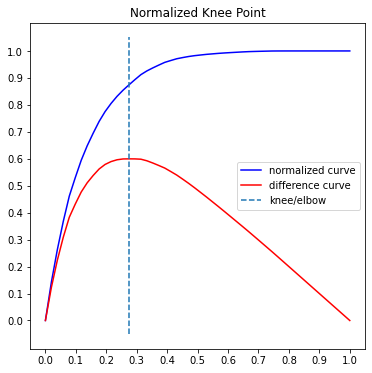

In [330]:
# Primeiro vamos fitar o encoder, estimar as variáveis importantes e fitar o NMF
# utilizando nossa função estimate_nmf
ohe_fit, imp_dum_01 = create_relevant_set(train_tb_hotel_f, p_value_chi = 0.01)
ohe_fit, imp_var, pca_fit = estimate_pca(train_tb_hotel_f)


In [331]:
# Agora vamos utilizar os objetos fitados para projetar os componentes para os conjuntos de train e test.
train_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, pca_fit, train_tb_hotel_f)
test_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, pca_fit, test_tb_hotel_f)


AttributeError: to_dense not found

## Regressão logística II
Com nossos dados enriquecidos podemos testar os modelos que utilizamos anteriormente, utilizando os novos componentes para representar a informação presente nas variáveis categóricas e a lista de variáveis dummies extremamente relevantes. Vamos utilizar o python base para construir essa lista de variáveis de forma dinâmica.

In [ ]:
original_vars = ["log_lead_time", "is_company", "high_season"] # variáveis originais
pca_vars = ['C' + str(i) for i in range(pca_fit.n_components_)] # variáveis do PCA
dum_vars = imp_dum_01 # variáveis dummy extremamente relevantes
full_x_vars = original_vars + pca_vars + dum_vars # lista final de variáveis
print(full_x_vars)

['log_lead_time', 'is_company', 'high_season', 'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_Undefined', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_H', 'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L', 'deposit_t

In [202]:
X_train = train_tb_hotel_fd[full_x_vars]
X_test = test_tb_hotel_fd[full_x_vars]
y_train = train_tb_hotel_fd['is_cancelled']
y_test = test_tb_hotel_fd['is_cancelled']
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83974 entries, 0 to 83973
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype             
---  ------                          --------------  -----             
 0   log_lead_time                   83974 non-null  float64           
 1   is_company                      83974 non-null  bool              
 2   high_season                     83974 non-null  int64             
 3   C0                              83974 non-null  float64           
 4   C1                              83974 non-null  float64           
 5   C2                              83974 non-null  float64           
 6   C3                              83974 non-null  float64           
 7   C4                              83974 non-null  float64           
 8   C5                              83974 non-null  float64           
 9   C6                              83974 non-null  float64           
 10  C7                    

In [204]:
scaler = StandardScaler()
scaler.fit(X_train)
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)

LogisticRegression()

In [205]:
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.7886044591246903
Recall: 0.5463386727688787
F1-Score: 0.645488340655627


Text(0.5, 1.0, 'Best Threshold: 0.36 w/ F-1: 0.71')

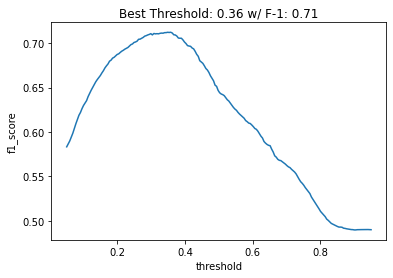

In [206]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)


## 1NN II

In [207]:
knn_fit = KNeighborsClassifier(n_neighbors=1)
knn_fit.fit(scaler.transform(X_train), y_train)
test_pred = knn_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.6873548848008573
Recall: 0.733886346300534
F1-Score: 0.7098588951397216


## Floresta Aleatória II
Precision: 0.7203344120819849

Recall: 0.76357918810749

F1-Score: 0.7413266722175964

In [208]:
stump_fit = RandomForestClassifier(
    n_estimators=1000, max_depth=100, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.7234507234507235
Recall: 0.7580091533180778
F1-Score: 0.7403268612934768


## Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gb_fit = GradientBoostingClassifier(
    n_estimators=1000, max_depth=10
)
gb_fit.fit(scaler.transform(X_train), y_train)
test_pred = gb_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.8052090609719589
Recall: 0.7693554538520213
F1-Score: 0.7868740552927982


Text(0.5, 1.0, 'Best Threshold: 0.37 w/ F-1: 0.79')

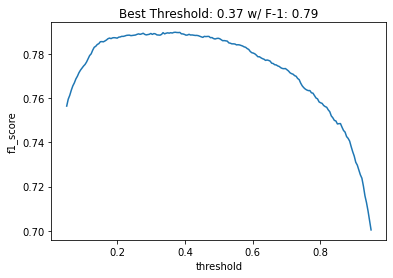

In [121]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = gb_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)

## EDA III
Chegamos em um bom resultado com os dois últimos algoritmos de ensemble, mas ainda temos algumas variáveis continuas em nosso dataset que não forem utilizadas. Vamos utilizar os resíduos desse último modelo como ponto de partida para entender se, adicionando mais variáveis, podemos deixar nosso modelo final melhor ainda.

Esta será a última etapa antes de implantarmos o ajuste de hiperparâmetros e testar o algoritmo de ensemble mais avançado em uso hoje em dia, o XGBoost

In [122]:
train_tb_hotel_fd["pred_fa"] = gb_fit.predict(X_train)

In [123]:
train_tb_hotel_fd["erro"] = np.where(
    train_tb_hotel_fd["is_cancelled"] == train_tb_hotel_fd["pred_fa"], 0, 1
)

In [124]:
train_tb_hotel_fd.columns

Index(['hotel', 'is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'arrival_date', 'id_booking',
       'arrival_date_month', 'arrival_date_year', 'is_agent', 'is_company',
       'log_lead_time', 'reservation_type', 'total_stays', 'per_weekend',
       'num_guests', 'per_child', 'adr_per_guest', 'has_cancelled',
       'has_fulfilled', 'grouped_country', 'high_season', 'C0', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'pred_fa', 'erro'],
      dtype='object')

In [125]:
untested_var = [
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "is_repeated_guest",
    "previous_cancellations",
    # "previous_bookings_not_canceled",
    "adults",
    "children",
    "babies",
    "booking_changes",
    "adr",
    "required_car_parking_spaces",
    "total_of_special_requests",
]

Como ainda temos muitas variáveis fora do modelo, vamos iniciar nossa investigação de quais podem contribuir para o modelo final utilizando uma regressão logística para entender quais variáveis tem um impacto estatisticamente relevante (valor-p < 0.05) sobre o erro do nosso modelo. Comentei a linha das variáveis acima para evitar um erro de matriz singular: este tipo de erro acontece quando existe um grave problema de colinearidade em nossos dados (no caso atual entre as variáveis de bookings anteriores).

In [126]:
import statsmodels.api as sm

scaler_eda = StandardScaler()
scaler_eda.fit(train_tb_hotel_fd[untested_var].fillna(0))
X_eda = sm.add_constant(train_tb_hotel_fd[untested_var])
y_eda = train_tb_hotel_fd["erro"]

logit_mod = sm.Logit(y_eda, X_eda)
logit_res = logit_mod.fit()
print(logit_res.summary())


Optimization terminated successfully.
         Current function value: 0.576334
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   erro   No. Observations:                83974
Model:                          Logit   Df Residuals:                    83962
Method:                           MLE   Df Model:                           11
Date:                Wed, 06 Apr 2022   Pseudo R-squ.:                 0.03251
Time:                        12:18:52   Log-Likelihood:                -48397.
converged:                       True   LL-Null:                       -50023.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8320      0.034    -54.174      0.000   

O modelo acima indica que quase todas as variáveis continuas que estão de fora tem impacto relevante sobre o erro do modelo anterior! Isso nos diz que devemos considera-las, seja em sua forma atual seja através de alguma transformação em nosso modelo. Vamos investigar a distribuição de cada uma dessas variáveis e a sua estrutura de correlação.

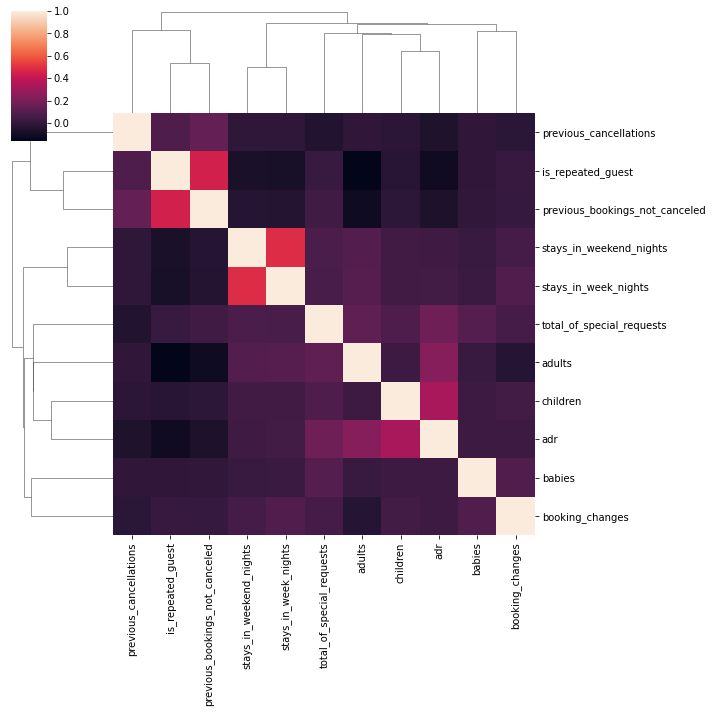

In [127]:
# Vamos criar uma nova lista apenas com as variáveis que se mostraram relevantes
rel_var = [
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "is_repeated_guest",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "adults",
    "children",
    "babies",
    "booking_changes",
    "adr",
    "total_of_special_requests",
]
sns.clustermap(data=train_tb_hotel_fd[rel_var].corr())


Lendo o dendograma acima podemos ver que temos 3 grandes grupos de variáveis:

1. `previous_cancellations` + `is_repeated_guest` + `previous_bookings_not_cancelled`
1. `adults` + `total_of_special_requests` + `children` + `adr`
1. `stays_in_weekend_nights` + `stays_in_week_nights`

O **primeiro grupo é muito bem definido**, representando o histórico de clientes que já fizeram reservas. O **segundo é um grupo menos bem definido** mas a variável ADR nos dá uma dica: o número de pessoas na reserva e o tamanho desta (o ADR deve ser proporcional ao número de pessoas total e ao número de requisitos especiais). O **terceiro grupo é muito bem definido**, sendo o tempo de estadia da reserva (noites totais e o mix entre finais de semana e dias de semana)

Podemos ver duas transformações claras a partir da análise acima:

1. Converter as variáveis `stays_in_weekend_nights` e `stays_in_week_nights` em `total_stays` (`stays_in_weekend_nights + stays_in_week_nights`) e `per_weekend` (`stays_in_weekend_nights / total_stays`). Dessa forma representamos o comprimento da reserva assim como a distribuição desta entre finais de semana e dias de semana.
1. Converter a variável `adr` em `adr_per_guest` através da transformação `adr/(adults + children)`
1. Converter as variáveis `adults` e `children` em `num_guests` - imaginando que bebês não contribuem para o preço da reserva diretamente, apenas através de pedidos especiais (como guardas de cama ou berços).
1. Criar as variáveis binárias `has_cancelled` (= 1 quando `previous_cancellations` > 0) e `has_fulfilled` (= 1 quando `previous_bookings_not_canceled` > 0)

Vamos incluir essas transformações na nossa função de transformação. Além disso vamos manter as variáveis `babies` e `booking_changes`, que não pertencem a nenhum dos 3 grupos.

In [342]:
def transform_data_v2(hotel_data):
    tb_hotel = hotel_data.copy()

    tb_hotel["is_agent"] = np.where(tb_hotel["agent"].isna(), False, True)
    tb_hotel["is_company"] = np.where(tb_hotel["company"].isna(), False, True)
    tb_hotel["arrival_date"] = pd.to_datetime(tb_hotel["arrival_date"])
    tb_hotel["arrival_date_month"] = tb_hotel["arrival_date"].dt.month
    tb_hotel["arrival_date_year"] = tb_hotel["arrival_date"].dt.year
    tb_hotel["log_lead_time"] = np.log(tb_hotel["lead_time"] + 1)
    tb_hotel["reservation_type"] = np.where(
        (tb_hotel["lead_time"] + 1) < 10, "last_minute", "scheduled"
    )
    tb_hotel = tb_hotel.drop(["company", "agent"], axis=1)
    tb_hotel["total_stays"] = (
        tb_hotel["stays_in_weekend_nights"] + tb_hotel["stays_in_week_nights"]
    )
    tb_hotel["per_weekend"] = (
        tb_hotel["stays_in_weekend_nights"] / tb_hotel["total_stays"]
    )
    tb_hotel["num_guests"] = np.where(tb_hotel["adults"] + tb_hotel["children"] > 0, tb_hotel["adults"] + tb_hotel["children"], 1)
    

    tb_hotel["per_child"] = tb_hotel["children"] / tb_hotel["num_guests"]
    tb_hotel["adr_per_guest"] = tb_hotel["adr"] / tb_hotel["num_guests"]
    tb_hotel["has_cancelled"] = np.where(tb_hotel["previous_cancellations"] > 0, 1, 0)
    tb_hotel["has_fulfilled"] = np.where(
        tb_hotel["previous_bookings_not_canceled"] > 0, 1, 0
    )
    tb_hotel = tb_hotel.fillna(0)
    return tb_hotel


## Modelos Finais
Agora podemos proceder na construção e otimização dos ultimos modelos. Neste momento implantamos a tunagem automatica de hiperparâmetros.

15 componentes
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


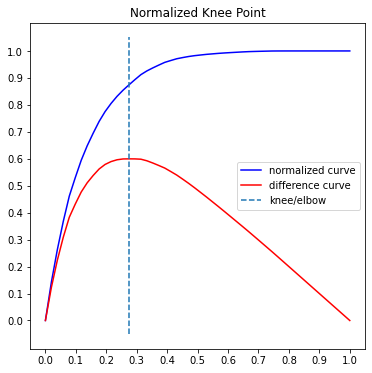

In [343]:
# Transformção direta de variáveis
train_tb_hotel_t = transform_data_v2(train_tb_hotel)
test_tb_hotel_t = transform_data_v2(test_tb_hotel)
# Criação dos indices de sazonalidade por país e mês
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel_t, tb_gc, tb_season)
test_tb_hotel_f = transform_country(test_tb_hotel_t, tb_gc, tb_season)
# Criação dos componentes de variáveis categóricas relevantes
ohe_fit, imp_dum_01 = create_relevant_set(train_tb_hotel_f, p_value_chi = 0.01)
ohe_fit, imp_var, nmf_fit = estimate_pca(train_tb_hotel_f)
train_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, nmf_fit, train_tb_hotel_f)
test_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, nmf_fit, test_tb_hotel_f)

In [344]:
original_vars = ["log_lead_time", "is_company", "high_season"] # variáveis originais
pca_vars = ['C' + str(i) for i in range(pca_fit.n_components_)] # variáveis do PCA
#dum_vars = imp_dum_01 # variáveis dummy extremamente relevantes
eda3_vars = ["total_stays", "per_weekend", "num_guests", "per_child", "adr_per_guest", "has_cancelled", "has_fulfilled"]
full_x_vars = original_vars + pca_vars + dum_vars + eda3_vars # lista final de variáveis
X_train = train_tb_hotel_fd[full_x_vars]
X_test = test_tb_hotel_fd[full_x_vars]
print(X_train.shape)
print(X_test.shape)
y_train = train_tb_hotel_fd['is_cancelled']
y_test = test_tb_hotel_fd['is_cancelled']

scaler = StandardScaler()
scaler.fit(X_train)

(84910, 70)
(28496, 70)


StandardScaler()

In [345]:
X_train.describe()

,log_lead_time,high_season,C0,C1,C2,C3,C4,C5,C6,C7,...,grouped_country_GBR,grouped_country_PRT,grouped_country_other,total_stays,per_weekend,num_guests,per_child,adr_per_guest,has_cancelled,has_fulfilled
count,84910.000000,84910.000000,8.491000e+04,8.491000e+04,8.491000e+04,8.491000e+04,8.491000e+04,8.491000e+04,8.491000e+04,8.491000e+04,...,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000,84910.000000
mean,3.844640,0.609222,1.282117e-14,-5.923573e-14,-4.469065e-15,-1.560232e-14,1.954406e-15,-1.634263e-15,-3.066535e-16,2.320825e-15,...,0.099470,0.407832,0.271146,3.430468,0.252798,1.962183,0.030766,55.036438,0.054835,0.030550
std,1.610078,0.487928,8.505398e-01,6.962482e-01,6.401289e-01,5.984169e-01,5.627195e-01,4.824510e-01,4.684612e-01,4.274941e-01,...,0.299294,0.491435,0.444554,2.571314,0.280337,0.679373,0.115841,29.575924,0.227658,0.172096
min,0.000000,0.000000,-1.522912e+00,-1.395316e+00,-1.636050e+00,-1.773502e+00,-1.238352e+00,-1.561037e+00,-1.082639e+00,-1.207805e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.190000,0.000000,0.000000
25%,2.944439,0.000000,-6.027096e-01,-5.331066e-01,-4.000430e-01,-4.726122e-01,-4.225901e-01,-3.625805e-01,-2.862237e-01,-3.309530e-01,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,37.400000,0.000000,0.000000
50%,4.248495,1.000000,-1.773045e-01,7.823967e-02,-8.958536e-02,-8.939518e-02,-1.200167e-01,-2.891741e-02,-8.543381e-02,3.033892e-02,...,0.000000,0.000000,0.000000,3.000000,0.250000,2.000000,0.000000,49.500000,0.000000,0.000000
75%,5.093750,1.000000,8.124136e-01,3.995952e-01,4.437119e-01,4.093932e-01,3.853372e-01,3.020992e-01,3.502445e-01,3.685425e-01,...,0.000000,1.000000,1.000000,4.000000,0.400000,2.000000,0.000000,66.000000,0.000000,0.000000
max,6.603944,1.000000,2.202775e+00,2.028516e+00,1.983569e+00,2.028378e+00,2.271881e+00,1.866515e+00,2.067011e+00,1.643778e+00,...,1.000000,1.000000,1.000000,69.000000,1.000000,40.000000,1.000000,2700.000000,1.000000,1.000000


### Regressão Logística III

Vamos começar reconstruindo nosso baseline a partir do nosso conjunto completo de features.

In [346]:
log_fit = LogisticRegression()
log_fit.fit(scaler.transform(X_train), y_train)
print(
    f"Precision: {precision_score(y_test, log_fit.predict(scaler.transform(X_test)))}"
)
print(f"Recall: {recall_score(y_test, log_fit.predict(scaler.transform(X_test)))}")
print(f"F1-Score: {f1_score(y_test, log_fit.predict(scaler.transform(X_test)))}")


Precision: 0.8124022187455554
Recall: 0.5434823977164606
F1-Score: 0.6512741576877031


Text(0.5, 1.0, 'Best Threshold: 0.34 w/ F-1: 0.72')

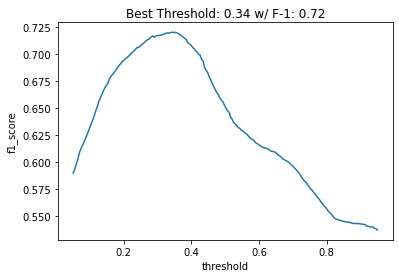

In [347]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = log_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title)


## Floresta Aleatória III

In [348]:
stump_fit = RandomForestClassifier(
    n_estimators=1000, max_depth=100, class_weight="balanced"
)
stump_fit.fit(scaler.transform(X_train), y_train)
test_pred = stump_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")


Precision: 0.8033719074221868
Recall: 0.7662226450999049
F1-Score: 0.7843576507256259


### Gradient Boosting II
0.785
0.783

In [242]:
gb_fit = GradientBoostingClassifier(
    n_estimators=1000, max_depth=10
)
gb_fit.fit(scaler.transform(X_train), y_train)
test_pred = gb_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.8116605616605617
Recall: 0.76058352402746
F1-Score: 0.7852923803898406


In [243]:
gb_fit = GradientBoostingClassifier(
    n_estimators=100, max_depth=20
)
gb_fit.fit(scaler.transform(X_train), y_train)
test_pred = gb_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.8097820525938811
Recall: 0.7545766590389016
F1-Score: 0.7812052712107004


### Utilizando a CATBOOST
Embora o Gradient Boosting da sklearn seja bom, já existem hoje em dia 3 outros desenvolvimentos de métodos de boosting: XGBoost, Catboost e LightGBM. Esses métodos trazem melhorias principalmente na tratativa dos diferentes fenômenos de overfitting que atrapalham os métodos de Boosting. 

Vou utilizar a biblioteca `catboost` que contém uma API em Python para o método de mesmo nome. Os conceitos de boosting são muito semelhantes, embora o processo de tunagem de hiperparâmetros seja um pouco mais simples quando utilizamos a catboost.

In [386]:
import catboost as cat

In [441]:
# 0.7816 com depth = 7
# 0.783 com depth = 8, melhor performance no Kaggle
# 0.7859 com depth = 9
# 0.7845 com depth = 10
# 8 performou melhor que todas as outras no conjunto de validação. Vamos partir pros próximos hiperparametros
# Utilizando o método de Langevin conseguimos um resultado muito próximo ao método normal (levemente inferior)
# Não estamos conseguindo melhorar significativamente o nosso modelo: as variações que estamos observando são resultado
# do tamanho de amostragem do conjunto de validação. A última etapa é treinar o modelo sobre o conjunto de dados completos
cat_fit = cat.CatBoostClassifier(iterations = 20000, depth = 8, auto_class_weights= "Balanced", od_type = "Iter", od_wait = 500)
cat_fit.fit(scaler.transform(X_train), y_train, eval_set = (scaler.transform(X_test), y_test))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.025788
0:	learn: 0.6654860	test: 0.6660461	best: 0.6660461 (0)	total: 46.3ms	remaining: 15m 26s
1:	learn: 0.6469117	test: 0.6477968	best: 0.6477968 (1)	total: 75.6ms	remaining: 12m 36s
2:	learn: 0.6268281	test: 0.6280974	best: 0.6280974 (2)	total: 98.8ms	remaining: 10m 58s
3:	learn: 0.6110279	test: 0.6127032	best: 0.6127032 (3)	total: 125ms	remaining: 10m 25s
4:	learn: 0.5941029	test: 0.5960194	best: 0.5960194 (4)	total: 148ms	remaining: 9m 51s
5:	learn: 0.5792866	test: 0.5814417	best: 0.5814417 (5)	total: 179ms	remaining: 9m 56s
6:	learn: 0.5652343	test: 0.5675501	best: 0.5675501 (6)	total: 219ms	remaining: 10m 24s
7:	learn: 0.5529733	test: 0.5555620	best: 0.5555620 (7)	total: 244ms	remaining: 10m 9s
8:	learn: 0.5427071	test: 0.5454725	best: 0.5454725 (8)	total: 272ms	remaining: 10m 4s
9:	learn: 0.5323781	test: 0.5353340	best: 0.5353340 (9)	total: 294ms	remaining: 9m 48s
10:	learn: 0.5243533	test: 0.5275237	best: 0.5275237 (10)	total: 315ms	remaining: 9m 33s
11:

In [442]:
test_pred = cat_fit.predict(scaler.transform(X_test))
print(f"Precision: {precision_score(y_test, test_pred)}")
print(f"Recall: {recall_score(y_test, test_pred)}")
print(f"F1-Score: {f1_score(y_test, test_pred)}")

Precision: 0.7363217427733557
Recall: 0.8361560418648906
F1-Score: 0.7830697259968813


Vamos espremer um pouco mais de performance otimizando o threshold do modelo. Esta etapa nem sempre melhora o resultado final: muitas vezes pioramos a performance em conjuntos de validação, logo devemos testar com e sem mudança de threshold

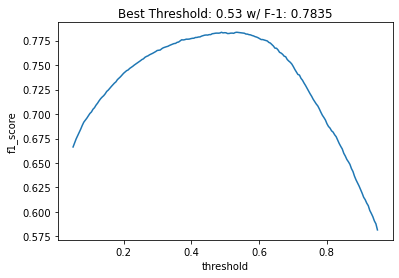

In [443]:
threshold_list = np.linspace(0.05, 0.95, 200)
test_proba = cat_fit.predict_proba(scaler.transform(X_test))[:, -1]

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(test_proba < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({"threshold": threshold_list, "f1_score": f1_list})
df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]
bt = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["threshold"].values[0]
f1 = df_f1[df_f1["f1_score"] == max(df_f1["f1_score"])]["f1_score"].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 4))
g = sns.lineplot(data=df_f1, x="threshold", y="f1_score")
g.set_title(title);


14 componentes
<class 'scipy.sparse.csr.csr_matrix'>


StandardScaler()

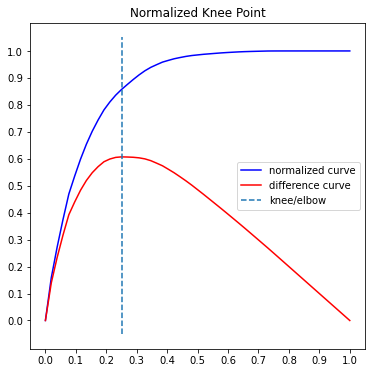

In [447]:
tb_hotel
# Transformção direta de variáveis
train_tb_hotel_t = transform_data_v2(tb_hotel)
# Criação dos indices de sazonalidade por país e mês
tb_gc = create_country_agg(train_tb_hotel_t)
tb_season = create_season(train_tb_hotel_t, tb_gc)
train_tb_hotel_f = transform_country(train_tb_hotel_t, tb_gc, tb_season)
# Criação dos componentes de variáveis categóricas relevantes
ohe_fit, imp_dum_01 = create_relevant_set(train_tb_hotel_f, p_value_chi = 0.01)
ohe_fit, imp_var, pca_fit = estimate_pca(train_tb_hotel_f)
train_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, pca_fit, train_tb_hotel_f)
original_vars = ["log_lead_time", "is_company", "high_season"] # variáveis originais
pca_vars = ['C' + str(i) for i in range(pca_fit.n_components_)] # variáveis do PCA
dum_vars = imp_dum_01 # variáveis dummy extremamente relevantes
eda3_vars = ["total_stays", "per_weekend", "num_guests", "per_child", "adr_per_guest", "has_cancelled", "has_fulfilled"]
full_x_vars = original_vars + pca_vars + dum_vars + eda3_vars # lista final de variáveis
X_train = train_tb_hotel_fd[full_x_vars]
y_train = train_tb_hotel_fd['is_cancelled']
scaler = StandardScaler()
scaler.fit(X_train)

In [450]:
cat_fit = cat.CatBoostClassifier(iterations = 4473, depth = 8, auto_class_weights= "Balanced")
cat_fit.fit(scaler.transform(X_train), y_train)

Learning rate set to 0.019664
0:	learn: 0.6726641	total: 45.9ms	remaining: 3m 25s
1:	learn: 0.6543956	total: 76.9ms	remaining: 2m 52s
2:	learn: 0.6369834	total: 102ms	remaining: 2m 32s
3:	learn: 0.6200769	total: 127ms	remaining: 2m 21s
4:	learn: 0.6051978	total: 153ms	remaining: 2m 16s
5:	learn: 0.5919432	total: 181ms	remaining: 2m 15s
6:	learn: 0.5811296	total: 213ms	remaining: 2m 15s
7:	learn: 0.5702643	total: 244ms	remaining: 2m 15s
8:	learn: 0.5627160	total: 274ms	remaining: 2m 15s
9:	learn: 0.5543823	total: 314ms	remaining: 2m 20s
10:	learn: 0.5455560	total: 343ms	remaining: 2m 19s
11:	learn: 0.5384487	total: 365ms	remaining: 2m 15s
12:	learn: 0.5323354	total: 388ms	remaining: 2m 13s
13:	learn: 0.5274338	total: 413ms	remaining: 2m 11s
14:	learn: 0.5218946	total: 435ms	remaining: 2m 9s
15:	learn: 0.5176520	total: 460ms	remaining: 2m 8s
16:	learn: 0.5132360	total: 488ms	remaining: 2m 7s
17:	learn: 0.5090875	total: 512ms	remaining: 2m 6s
18:	learn: 0.5051680	total: 537ms	remaining: 2

# Gerando previsões para competição
Agora fica claro a vantagem de empacotar todas as transformações em funções - é muito fácil aplica-las novamente ao conjunto de validação (ou qualquer outro conjunto!). A outra vantagem não aparece no produto final: os vários bugs que foram encontrados nas transformações (problemas com o calculo de sazonalidade para paises que só existiam no conjunto de validação e problemas com as variáveis `adr_per_guest` quando o `num_guests` era 0) são facilmente rastreados e tratados de maneira local, sem impactar o resto do código!

In [452]:
tb_hotel_valid = pd.read_csv("data/tb_hotel_feat_valid.csv")
# Transformção direta de variáveis
valid_tb_hotel_t = transform_data_v2(tb_hotel_valid)
# Criação dos indices de sazonalidade por país e mês
valid_tb_hotel_f = transform_country(valid_tb_hotel_t, tb_gc, tb_season)
# Criação dos componentes de variáveis categóricas relevantes
valid_tb_hotel_fd = project_cat(ohe_fit, imp_var, imp_dum_01, pca_fit, valid_tb_hotel_f)
X_valid = valid_tb_hotel_fd[full_x_vars]
pred_prob = cat_fit.predict_proba(scaler.transform(X_valid))[:,-1]
valid_tb_hotel_fd['is_cancelled'] = np.where(pred_prob > bt, 1, 0)
valid_kaggle = valid_tb_hotel_fd[['id_booking', 'is_cancelled']]
valid_kaggle.to_csv('data/kaggle_out.csv', index = False)

<class 'scipy.sparse.csr.csr_matrix'>
